**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import os
import matplotlib.lines as lines


import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


**Объявление функций**

In [2]:
# Функция расчета средней заработной платы для вакансии исходя из диапазона
def salary(row):
    min_val = int(''.join([a for a in row['salary_estimate'] if a.isdecimal() or a == '-']).split('-')[0])
    max_val = int(''.join([a for a in row['salary_estimate'] if a.isdecimal() or a == '-']).split('-')[1])
    return (max_val + min_val)/2 * 100

**Загрузка и изучение датасета**

In [3]:
data = pd.read_csv('data_engineer_jobs.csv', sep=',')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


In [5]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


Приведем названия столбцов к более корректному виду

In [6]:
data.columns = [x.lower().replace(' ', '_') for x in data.columns.tolist()]

Удалим лишнюю информацию из столбца с названием компании

In [7]:
data['company_name'] = data['company_name'].apply(lambda x: x.split('\n')[0])

Добавим столбец со средней зарплатой для вакансии

In [8]:
data['mean_salary'] = data.apply(salary,axis=1)

In [9]:
data.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,mean_salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,11500.0
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,11500.0
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,11500.0
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,11500.0
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,11500.0


**Цвета HeadHunter**

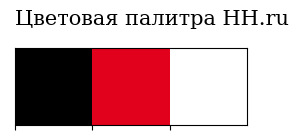

In [10]:
sns.palplot(['#000000', '#e1011c', '#ffffff'])

plt.title("Цветовая палитра HH.ru",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

**График компаний с самым большим числом вакансий**

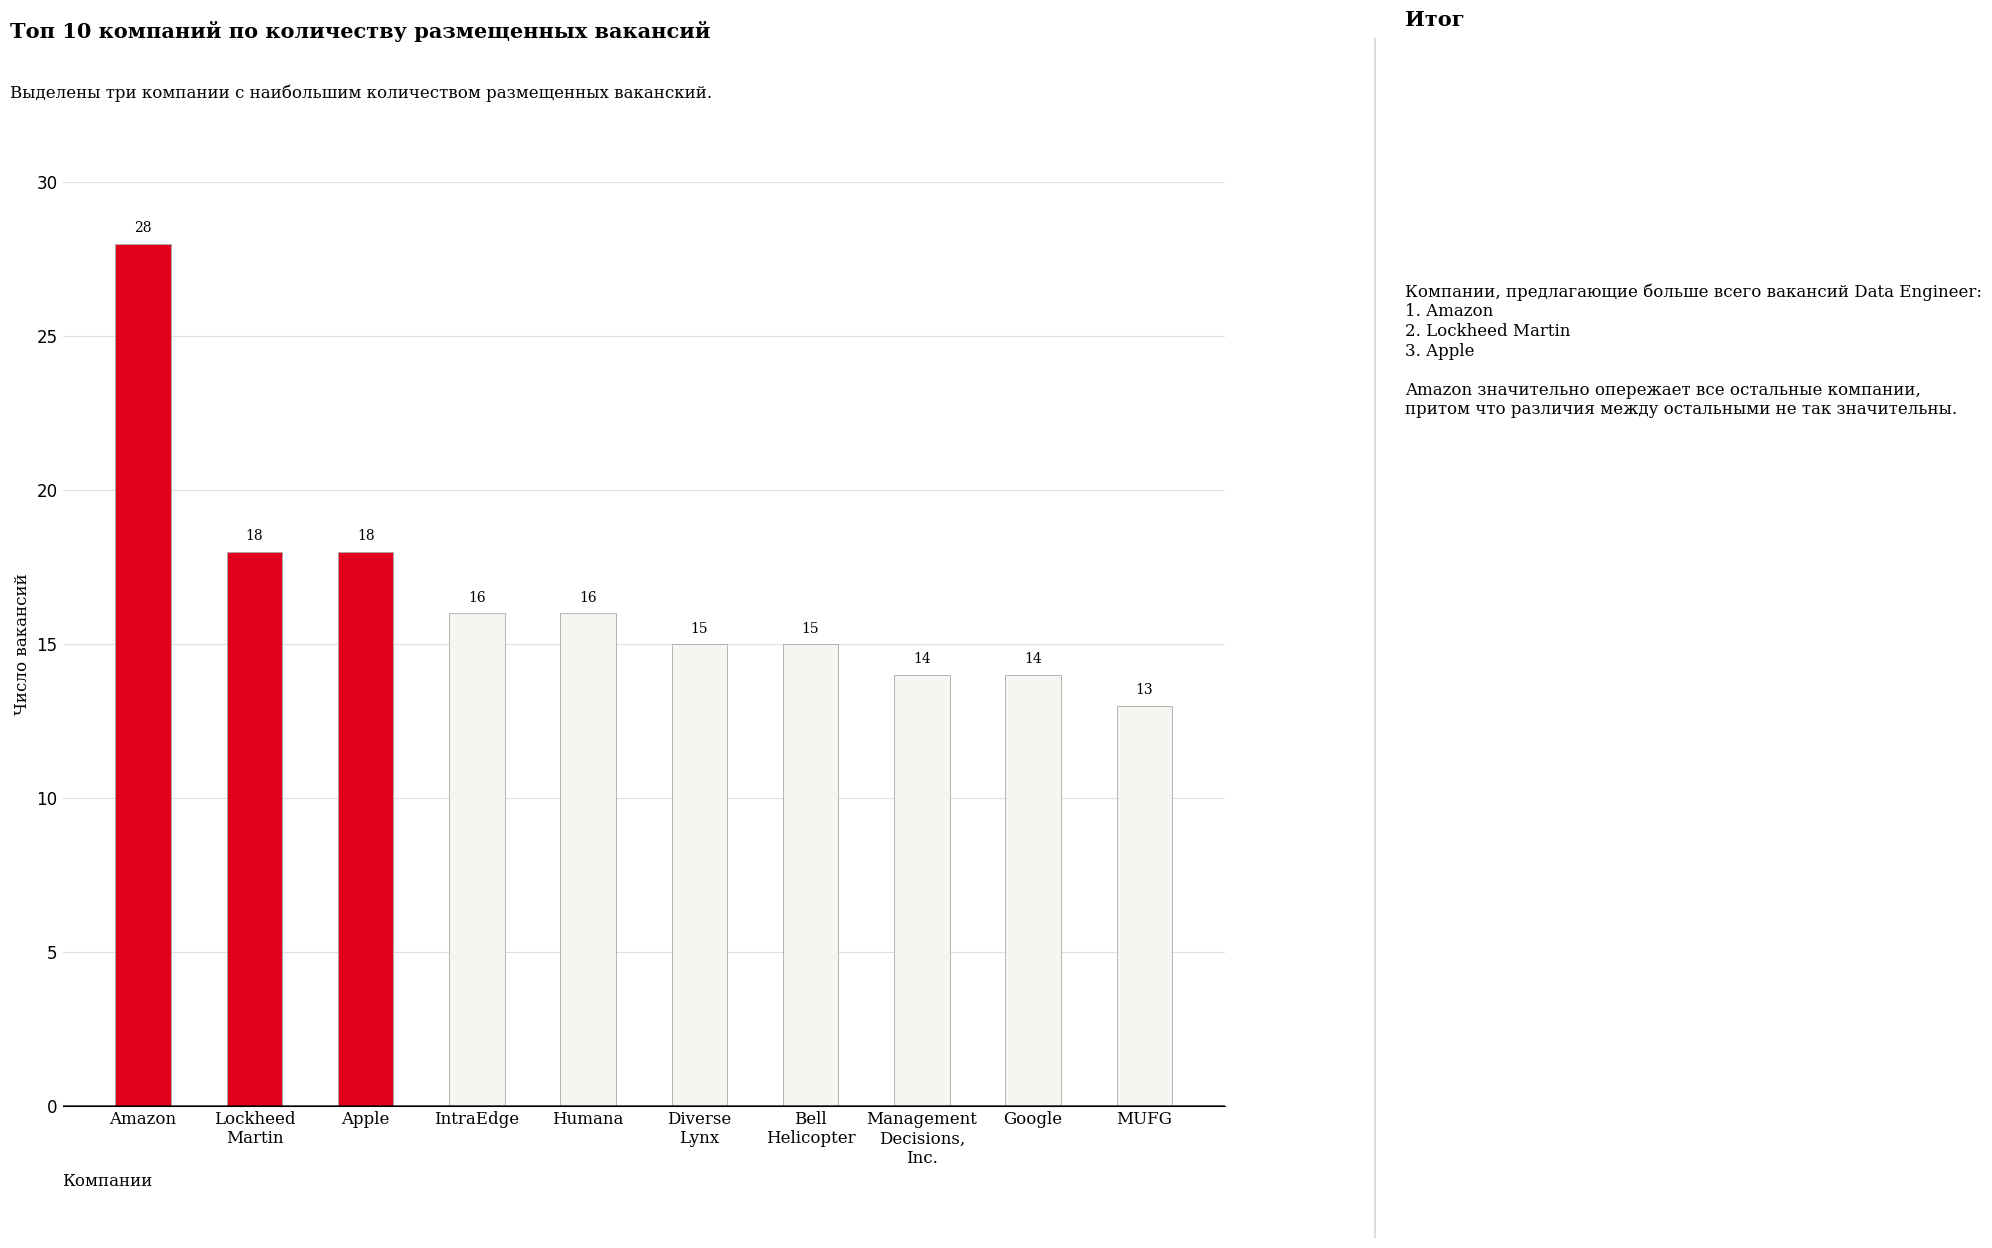

In [11]:
plot_data = data.groupby(by='company_name').agg(job_counts=('job_title', 'count')).sort_values(by='job_counts', ascending=False).head(10)

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e1011c'

fig, ax = plt.subplots(1,1, figsize=(15, 12))
ax.bar(plot_data.index, plot_data['job_counts'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels

ax.set_xticklabels([i.replace(' ', '\n')for i in plot_data.index], fontfamily='serif', rotation=0)

#annotations
for i in plot_data.index:
    ax.annotate(f"{plot_data.loc[i, 'job_counts']}", 
                   xy=(i, plot_data.loc[i, 'job_counts'] + 0.5), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


# Title and sub-title
fig.text(0.09, 1, 'Топ 10 компаний по количеству размещенных вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три компании с наибольшим количеством размещенных ваканский.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.02, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.02, 0.67, '''
Компании, предлагающие больше всего вакансий Data Engineer:
1. Amazon
2. Lockheed Martin
3. Apple

Amazon значительно опережает все остальные компании,  
притом что различия между остальными не так значительны.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 35, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
plt.xlabel("Компании", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel("Число вакансий", fontsize=12, fontweight='light', fontfamily='serif')

    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**График самых популярных названий в вакансиях**

Подготовим набор слов с их встречаемостью в названиях вакансий

In [12]:
words_list = [w for w in [''.join([l for l in word if l.isalpha()]).lower() for word in ' '.join(data['job_title']).split()] if w.isalpha()]
words_data = []
for el in set(words_list):
    counts = len([w for w in words_list if w == el])
    words_data.append([el, counts])

words_data = pd.DataFrame(words_data, columns=['word', 'counts'])

Построим график

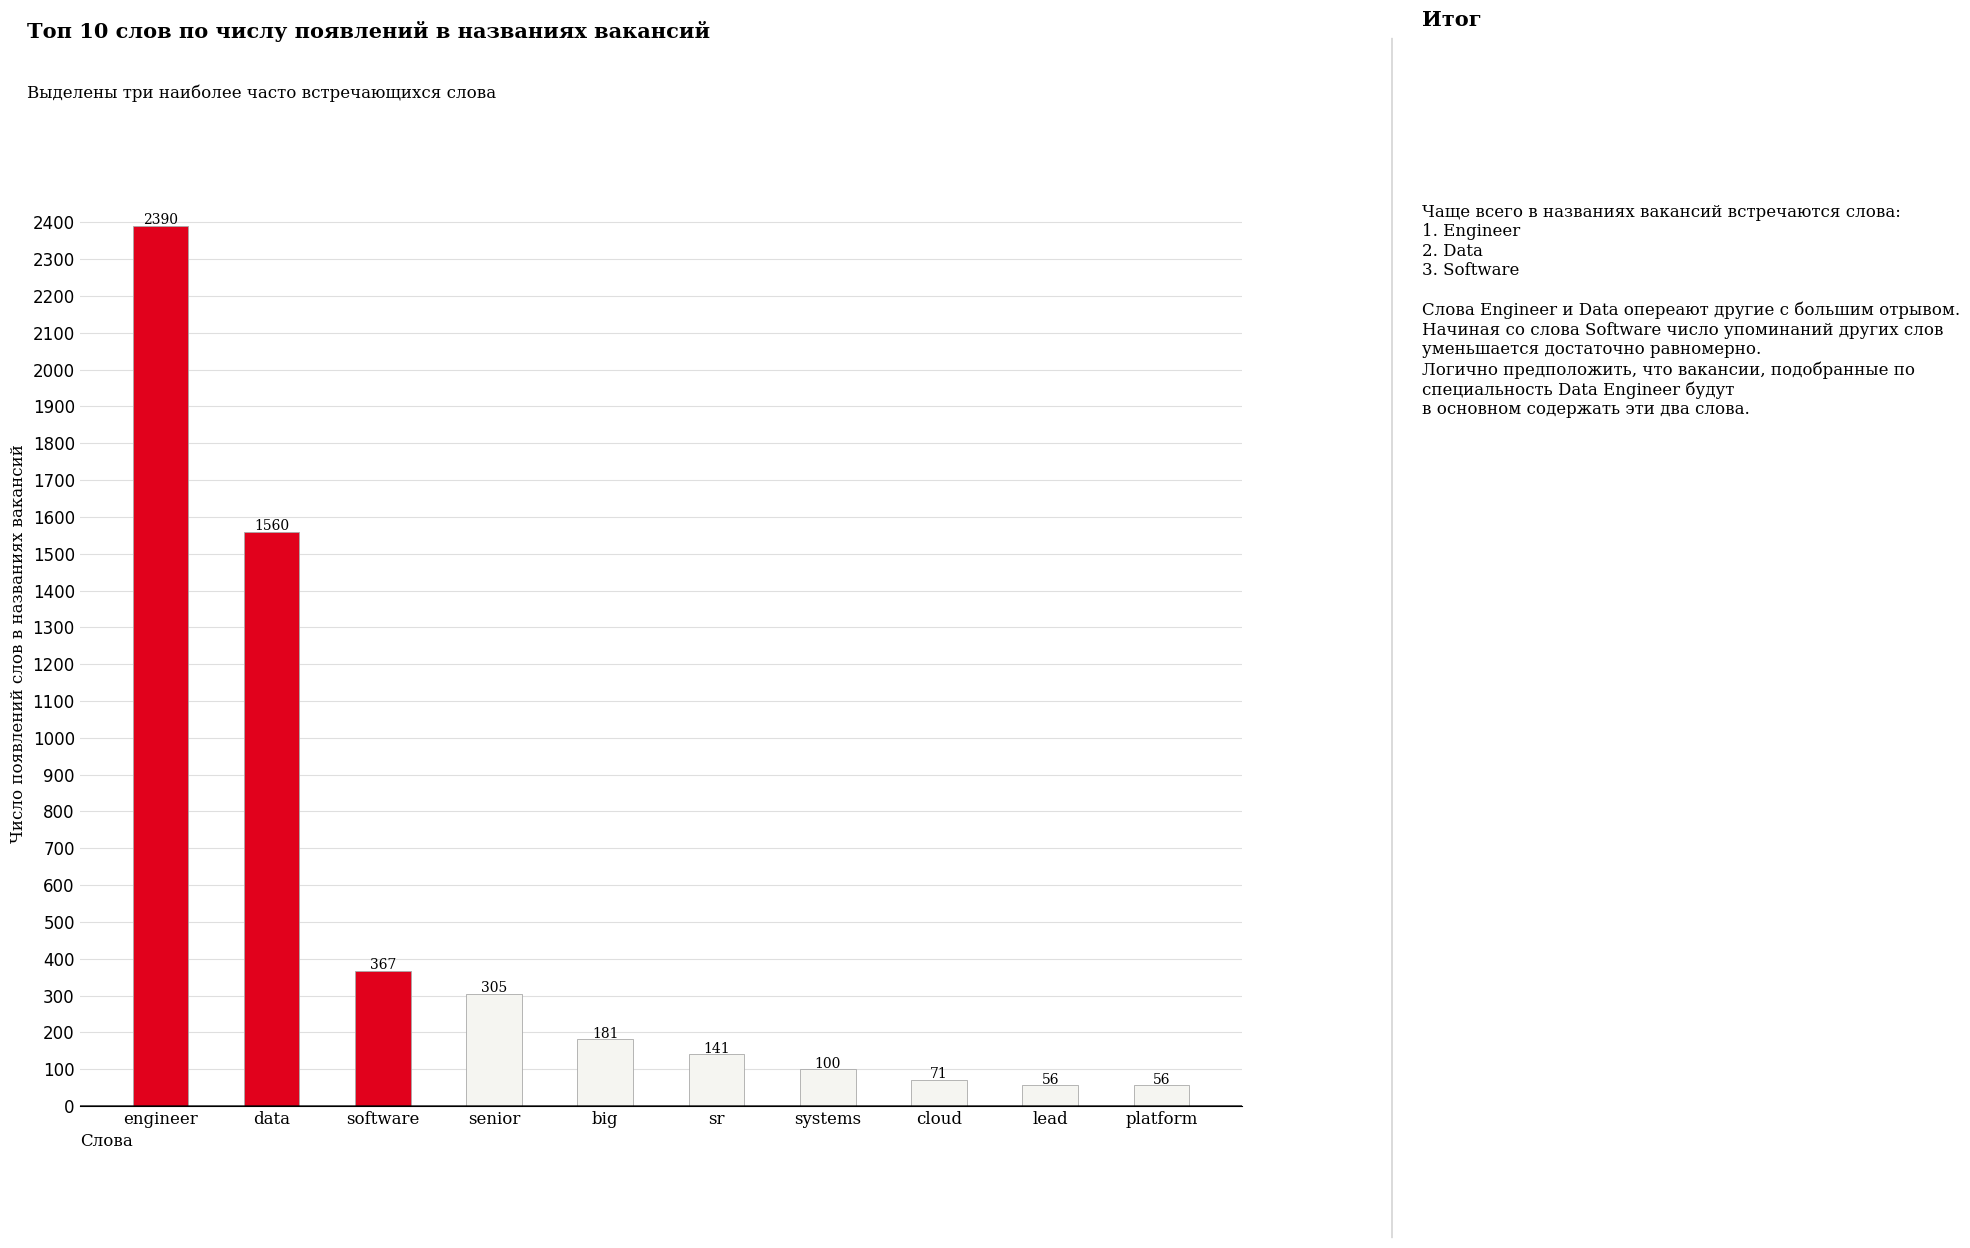

In [13]:
plot_data = words_data.sort_values(by='counts', ascending=False).head(10).set_index('word')

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e1011c'

fig, ax = plt.subplots(1,1, figsize=(15, 12))
ax.bar(plot_data.index, plot_data['counts'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels

ax.set_xticklabels([i.replace(' ', '\n')for i in plot_data.index], fontfamily='serif', rotation=0)

#annotations
for i in plot_data.index:
    ax.annotate(f"{plot_data.loc[i, 'counts']}", 
                   xy=(i, plot_data.loc[i, 'counts'] + 15), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


# Title and sub-title
fig.text(0.09, 1, 'Топ 10 слов по числу появлений в названиях вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три наиболее часто встречающихся слова', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.02, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.02, 0.67, '''
Чаще всего в названиях вакансий встречаются слова:
1. Engineer 
2. Data
3. Software

Слова Engineer и Data опереают другие с большим отрывом.
Начиная со слова Software число упоминаний других слов
уменьшается достаточно равномерно.
Логично предположить, что вакансии, подобранные по 
специальность Data Engineer будут
в основном содержать эти два слова.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 2500, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
plt.xlabel("Слова", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel("Число появлений слов в названиях вакансий", fontsize=12, fontweight='light', fontfamily='serif')

    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)



l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**График самых популярных местоположений вакансий по их численности (круговая диаграмма)**

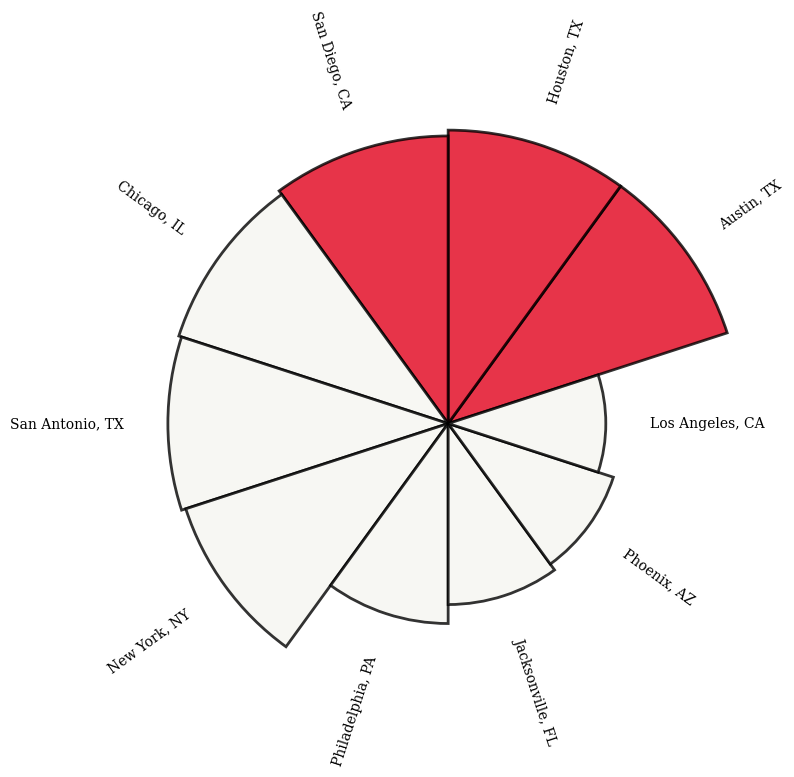

In [14]:
plot_data = data.groupby(by='location').agg(job_counts=('job_title', 'count')).sort_values(by='job_counts', ascending=False).head(10)

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e1011c'


# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = plot_data['job_counts'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * plot_data.job_counts + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(plot_data.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(plot_data.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="black",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, plot_data.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

**График популярности по колонке Type of ownership, относительно численности вакансий**

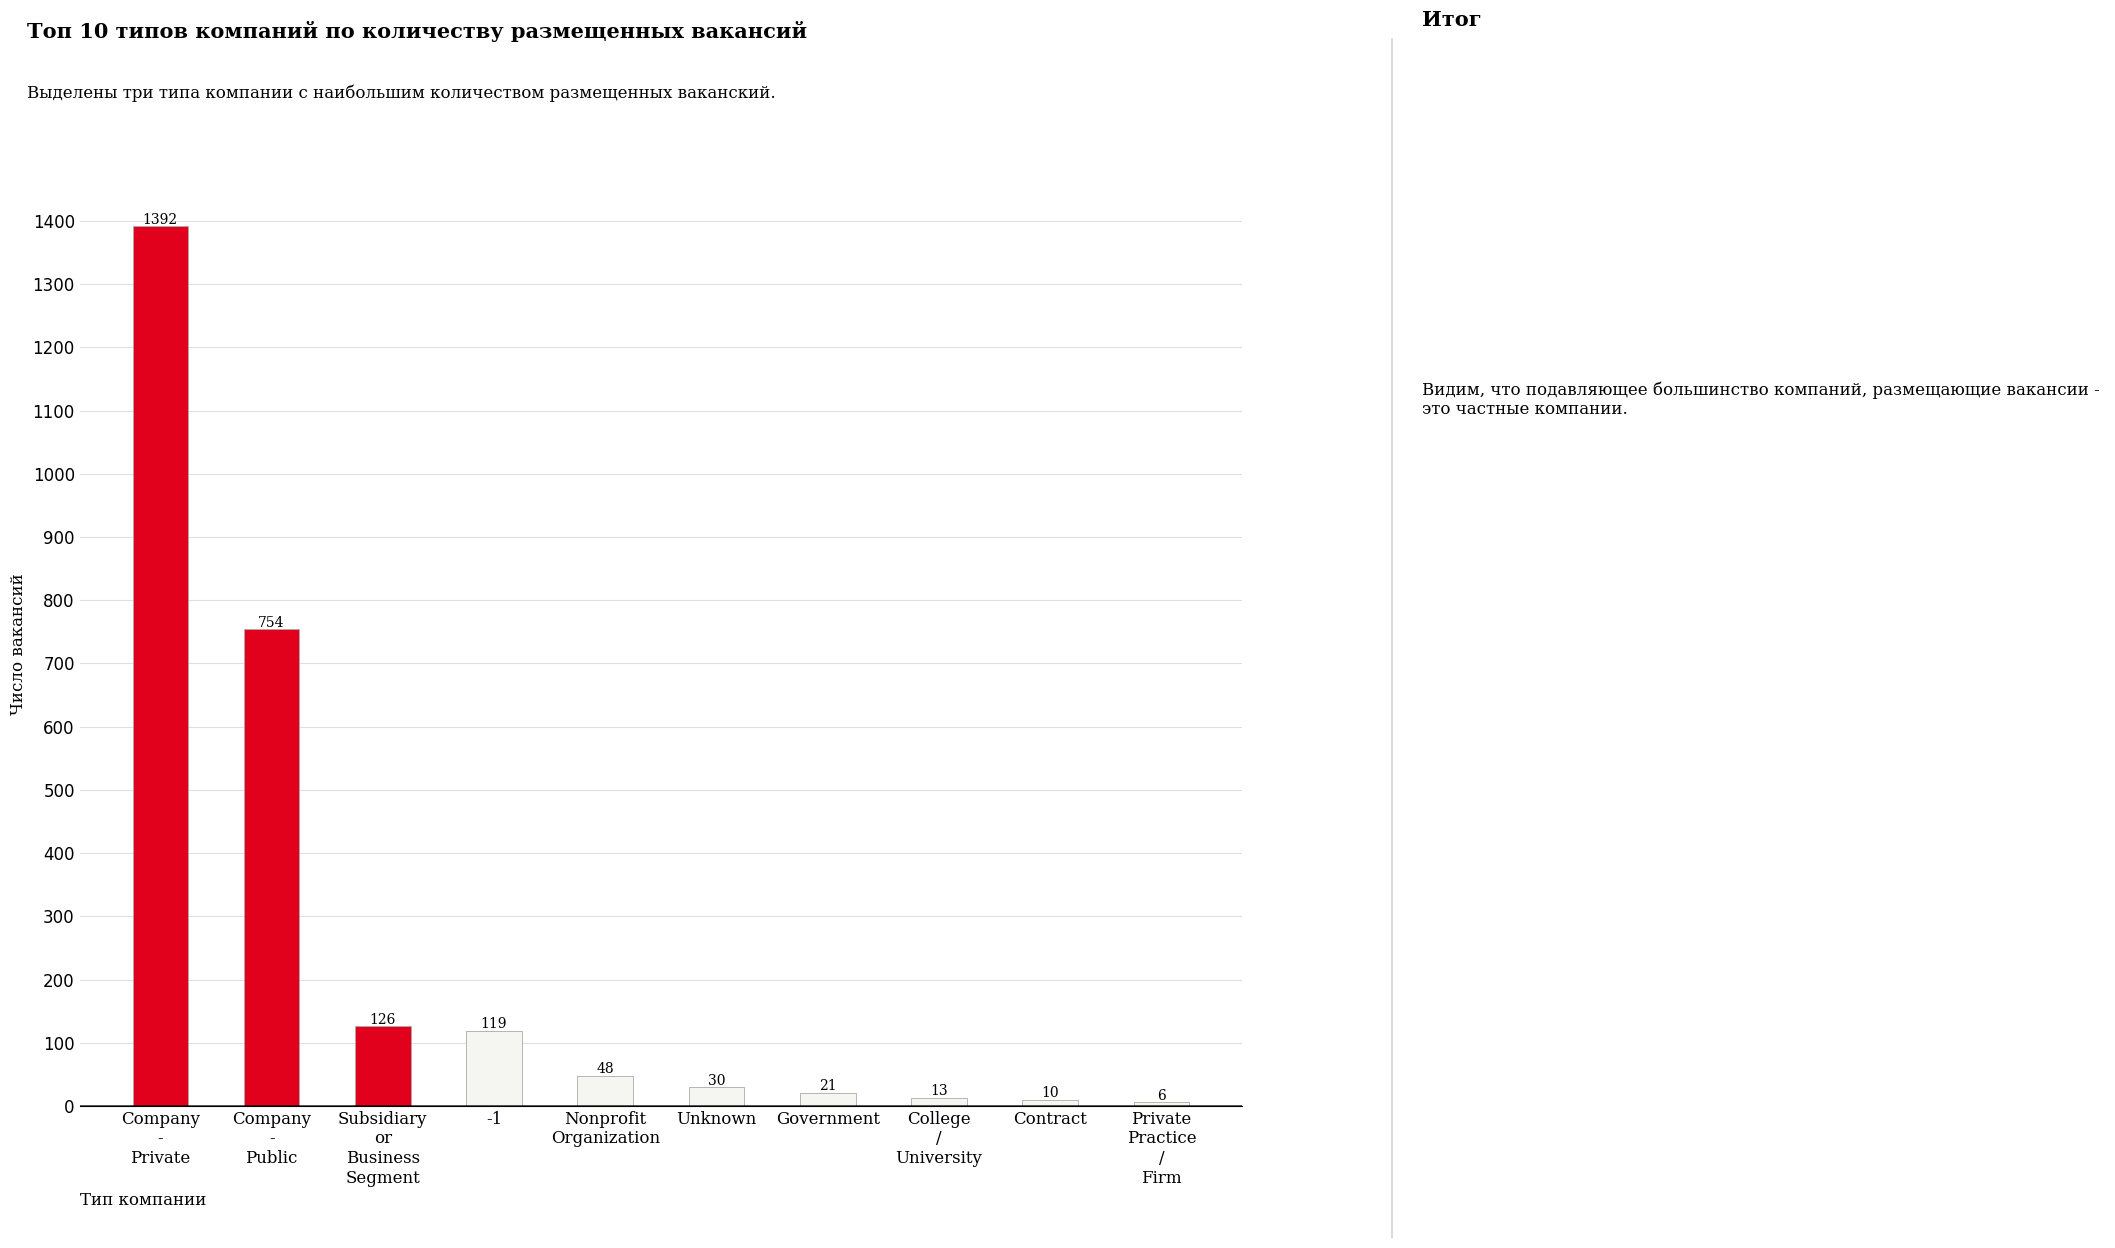

In [15]:
plot_data = data.groupby(by='type_of_ownership').agg(job_counts=('job_title', 'count')).sort_values(by='job_counts', ascending=False).head(10)

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e1011c'

fig, ax = plt.subplots(1,1, figsize=(15, 12))
ax.bar(plot_data.index, plot_data['job_counts'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels

ax.set_xticklabels([i.replace(' ', '\n')for i in plot_data.index], fontfamily='serif', rotation=0)

#annotations
for i in plot_data.index:
    ax.annotate(f"{plot_data.loc[i, 'job_counts']}", 
                   xy=(i, plot_data.loc[i, 'job_counts'] + 10), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


# Title and sub-title
fig.text(0.09, 1, 'Топ 10 типов компаний по количеству размещенных вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три типа компании с наибольшим количеством размещенных ваканский.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.02, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.02, 0.67, '''
Видим, что подавляющее большинство компаний, размещающие вакансии - 
это частные компании.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1500, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
plt.xlabel("Тип компании", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel("Число вакансий", fontsize=12, fontweight='light', fontfamily='serif')

    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)



l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**График популярности по секторам работы**

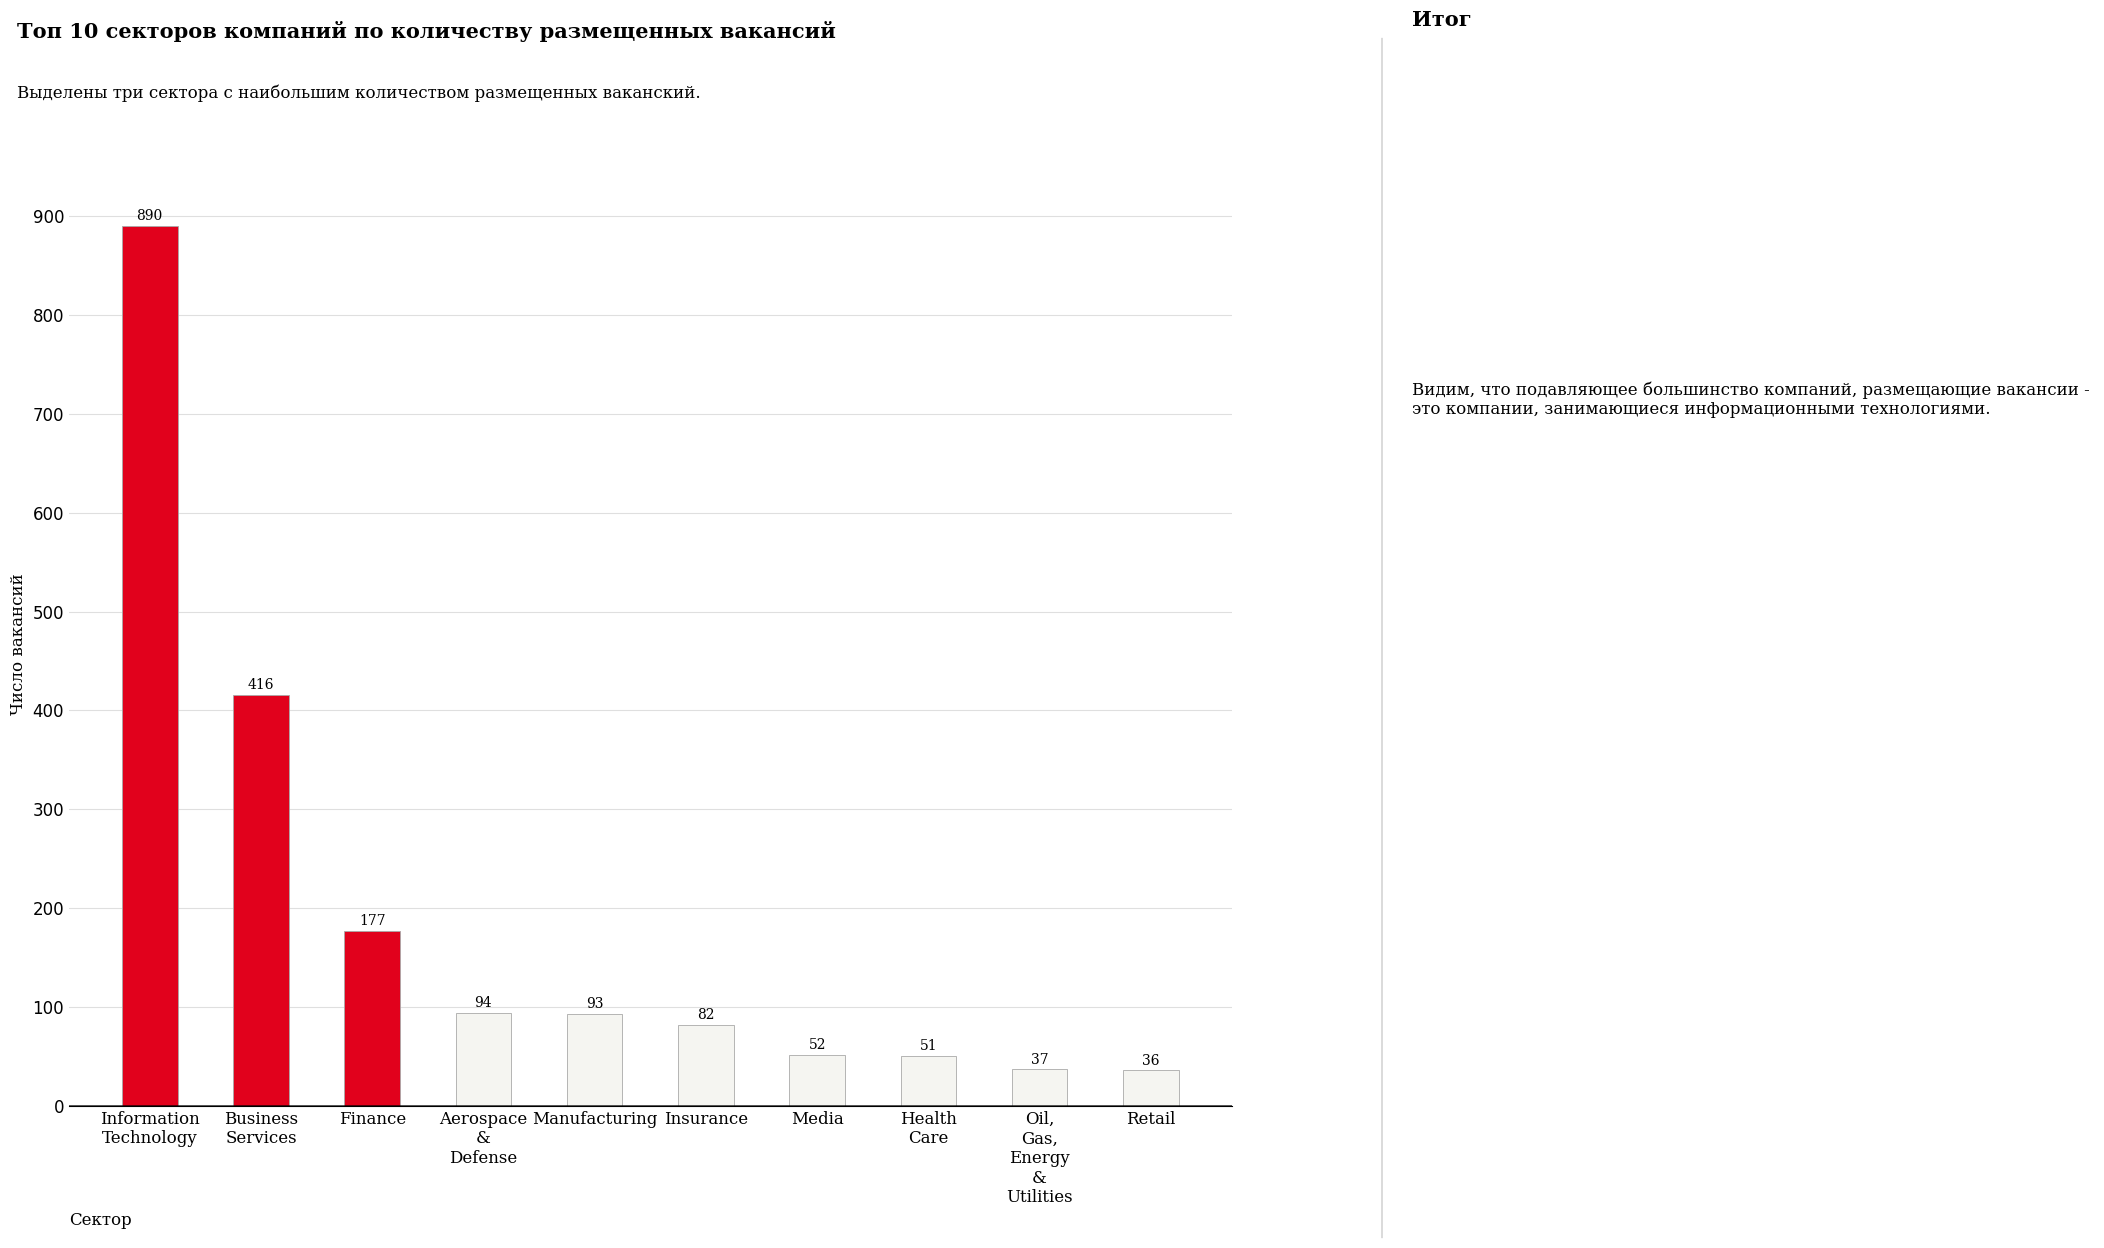

In [16]:
plot_data = data[data['sector'] != '-1'].groupby(by='sector').agg(job_counts=('job_title', 'count')).sort_values(by='job_counts', ascending=False).head(10)

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e1011c'

fig, ax = plt.subplots(1,1, figsize=(15, 12))
ax.bar(plot_data.index, plot_data['job_counts'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels

ax.set_xticklabels([i.replace(' ', '\n')for i in plot_data.index], fontfamily='serif', rotation=0)

#annotations
for i in plot_data.index:
    ax.annotate(f"{plot_data.loc[i, 'job_counts']}", 
                   xy=(i, plot_data.loc[i, 'job_counts'] + 10), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


# Title and sub-title
fig.text(0.09, 1, 'Топ 10 секторов компаний по количеству размещенных вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три сектора с наибольшим количеством размещенных ваканский.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.02, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.02, 0.67, '''
Видим, что подавляющее большинство компаний, размещающие вакансии - 
это компании, занимающиеся информационными технологиями.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1000, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
plt.xlabel("Сектор", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel("Число вакансий", fontsize=12, fontweight='light', fontfamily='serif')

    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)



l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**График отношения сектора работы и среднего уровня зарплат в них**

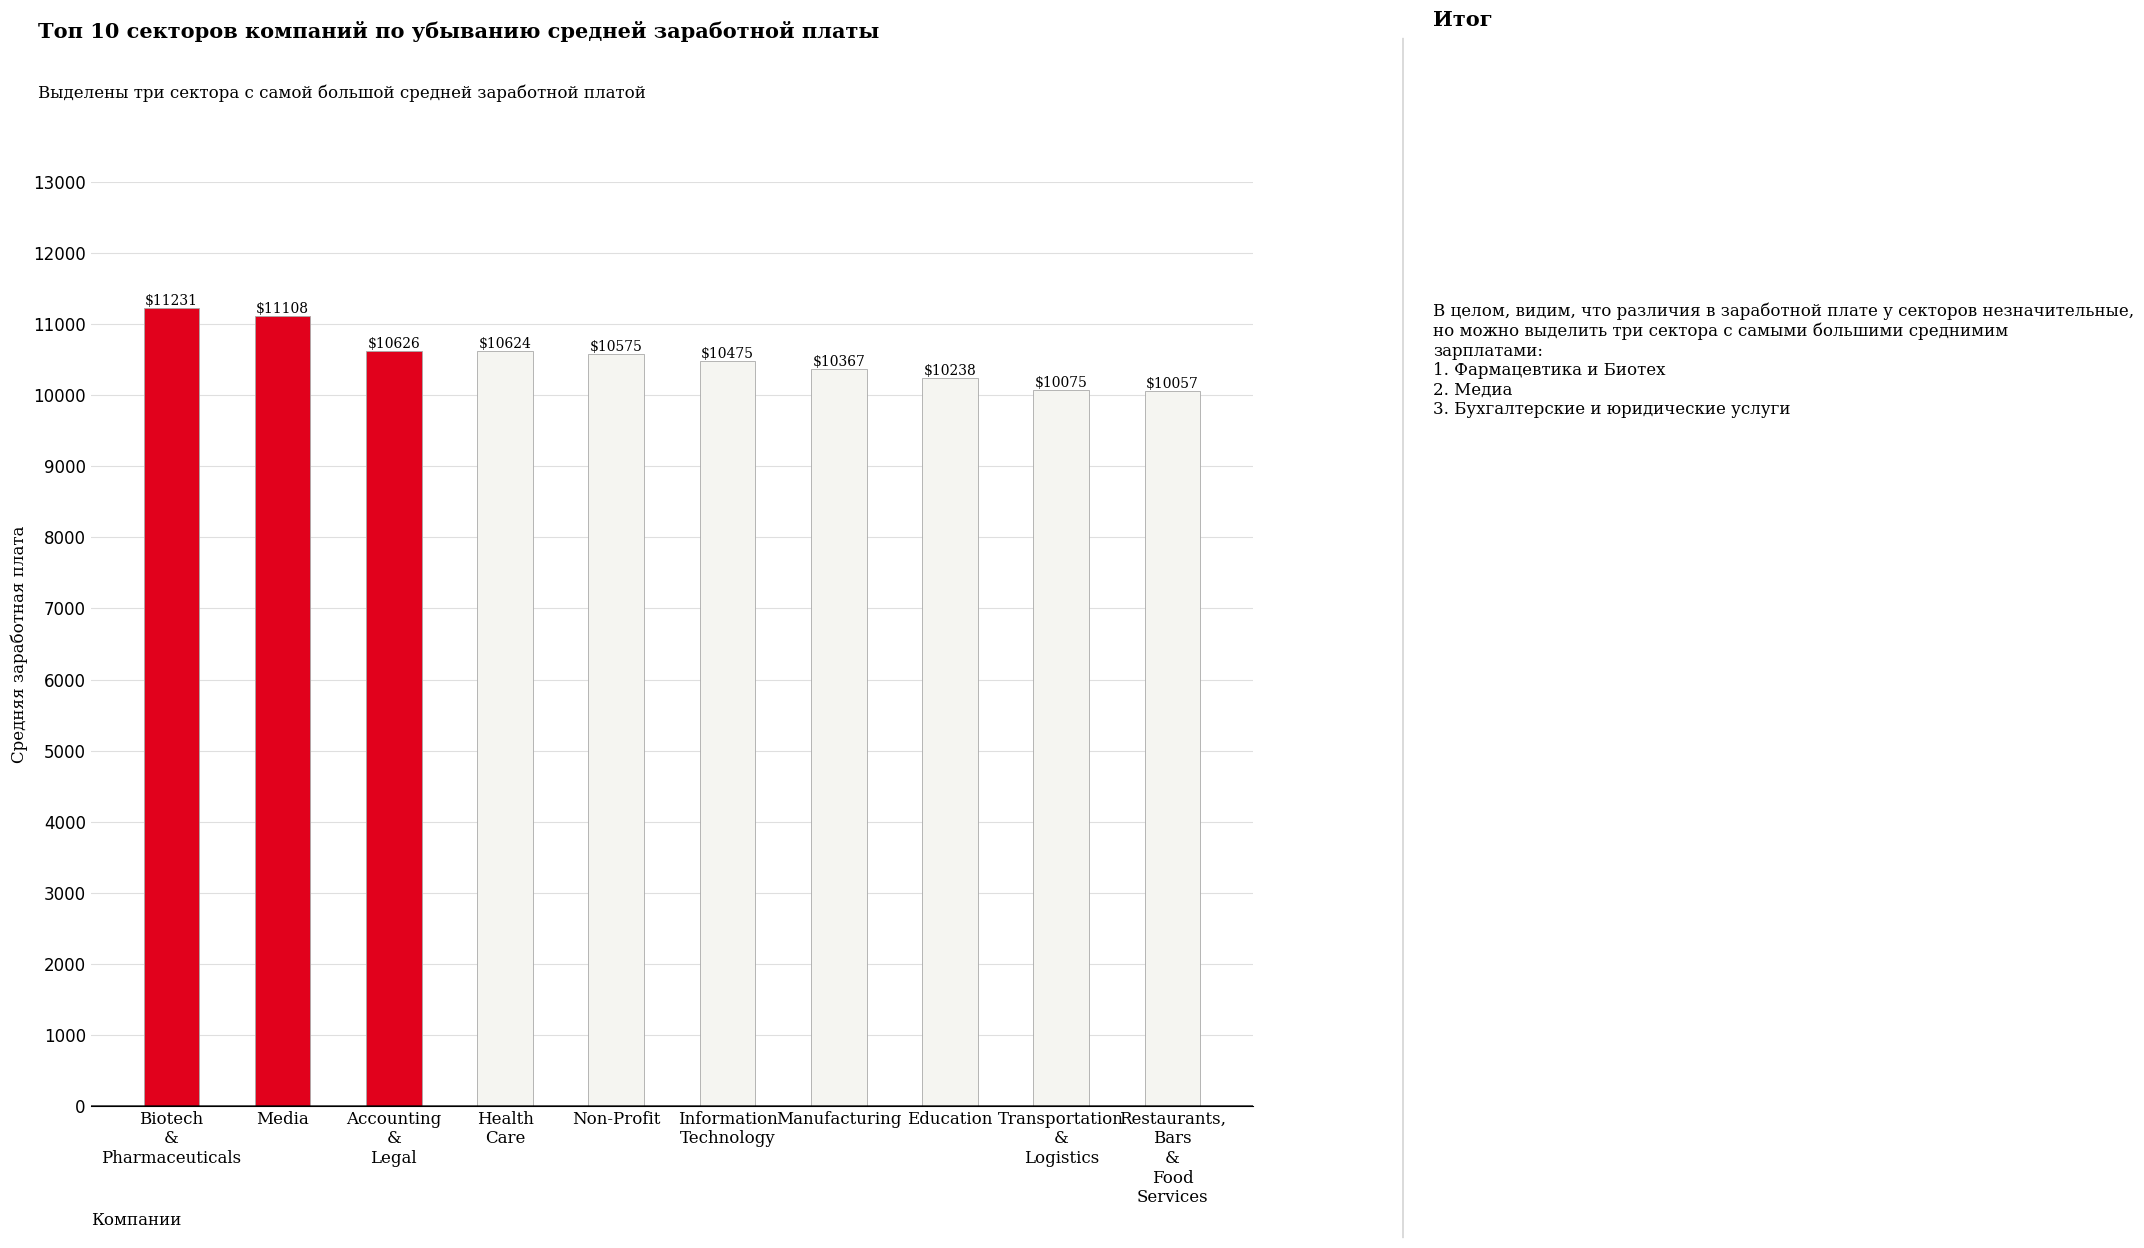

In [17]:
plot_data = (data.groupby(by='sector').agg(job_counts=('job_title', 'count'),
                                     mean_salary=('mean_salary', 'mean')).sort_values(by='mean_salary', ascending=False).head(10))

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e1011c'

fig, ax = plt.subplots(1,1, figsize=(15, 12))
ax.bar(plot_data.index, plot_data['mean_salary'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels

ax.set_xticklabels([i.replace(' ', '\n')for i in plot_data.index], fontfamily='serif', rotation=0)

#annotations
for i in plot_data.index:
    ax.annotate("${:.0f}".format(plot_data.loc[i, 'mean_salary']), 
                   xy=(i, plot_data.loc[i, 'mean_salary'] + 100), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


# Title and sub-title
fig.text(0.09, 1, 'Топ 10 секторов компаний по убыванию средней заработной платы', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три cектора с самой большой средней заработной платой', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.02, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.02, 0.67, '''
В целом, видим, что различия в заработной плате у секторов незначительные,
но можно выделить три сектора с самыми большими среднимим
зарплатами:
1. Фармацевтика и Биотех
2. Медиа
3. Бухгалтерские и юридические услуги
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 14000, 1000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
plt.xlabel("Компании", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel("Средняя заработная плата", fontsize=12, fontweight='light', fontfamily='serif')

    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)



l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**Гистограмма распределения рейтинга компаний**

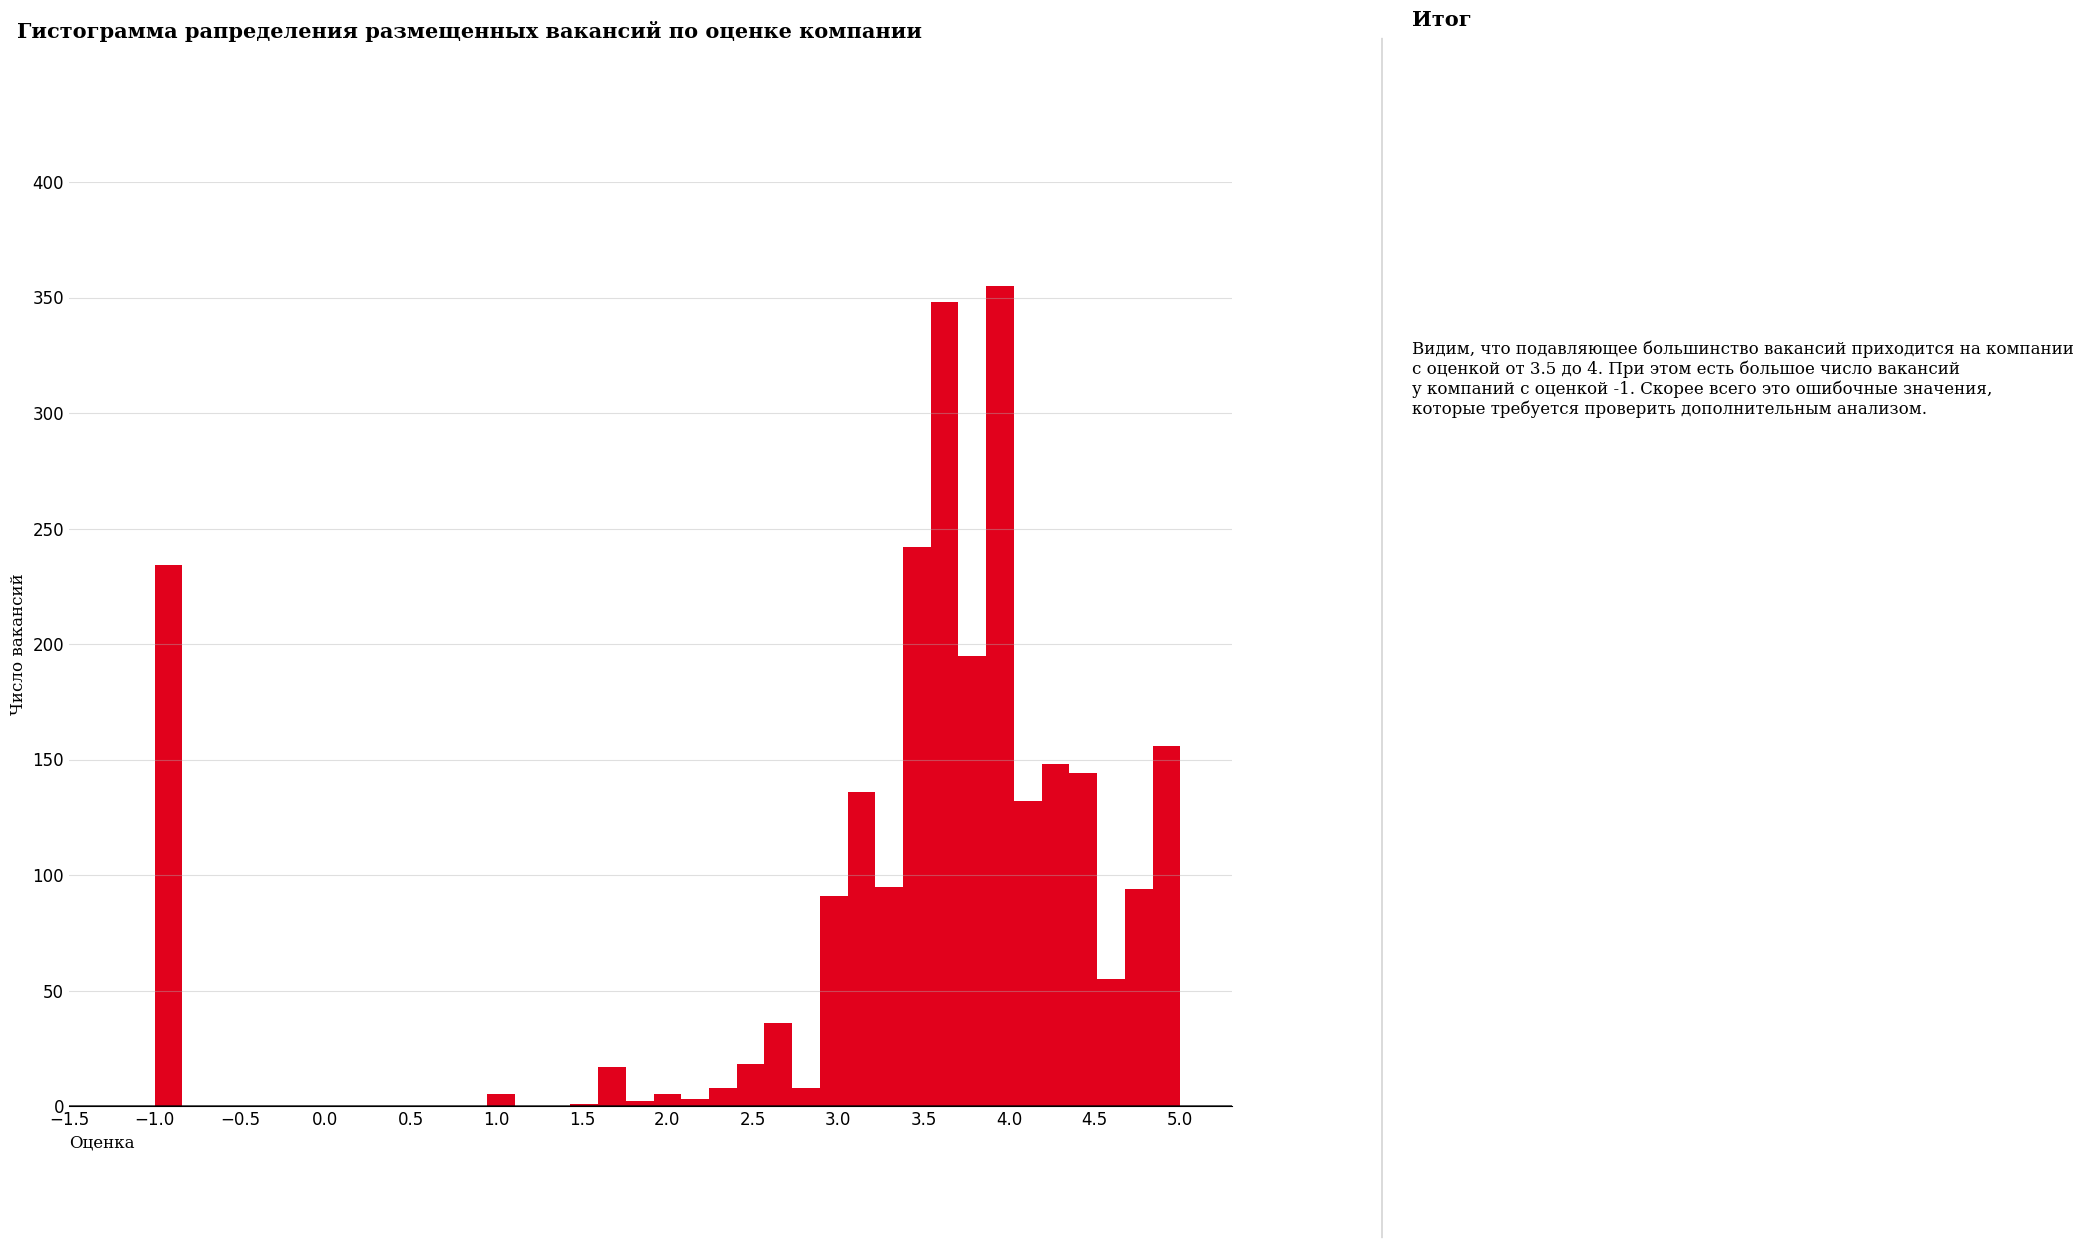

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15, 12))
ax.hist(data['rating'], bins=37, color='#e1011c')
fig.text(0.09, 1, 'Гистограмма рапределения размещенных вакансий по оценке компании', fontsize=15, fontweight='bold', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.xlabel("Оценка", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel("Число вакансий", fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)  
grid_y_ticks = np.arange(0, 410, 50) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_xticks(np.arange(-1.5, 5.5, 0.5))

fig.text(1.02, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.02, 0.67, '''
Видим, что подавляющее большинство вакансий приходится на компании
с оценкой от 3.5 до 4. При этом есть большое число вакансий
у компаний с оценкой -1. Скорее всего это ошибочные значения,
которые требуется проверить дополнительным анализом.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)



l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**График распределения средних зарплат по популярным компаниям**

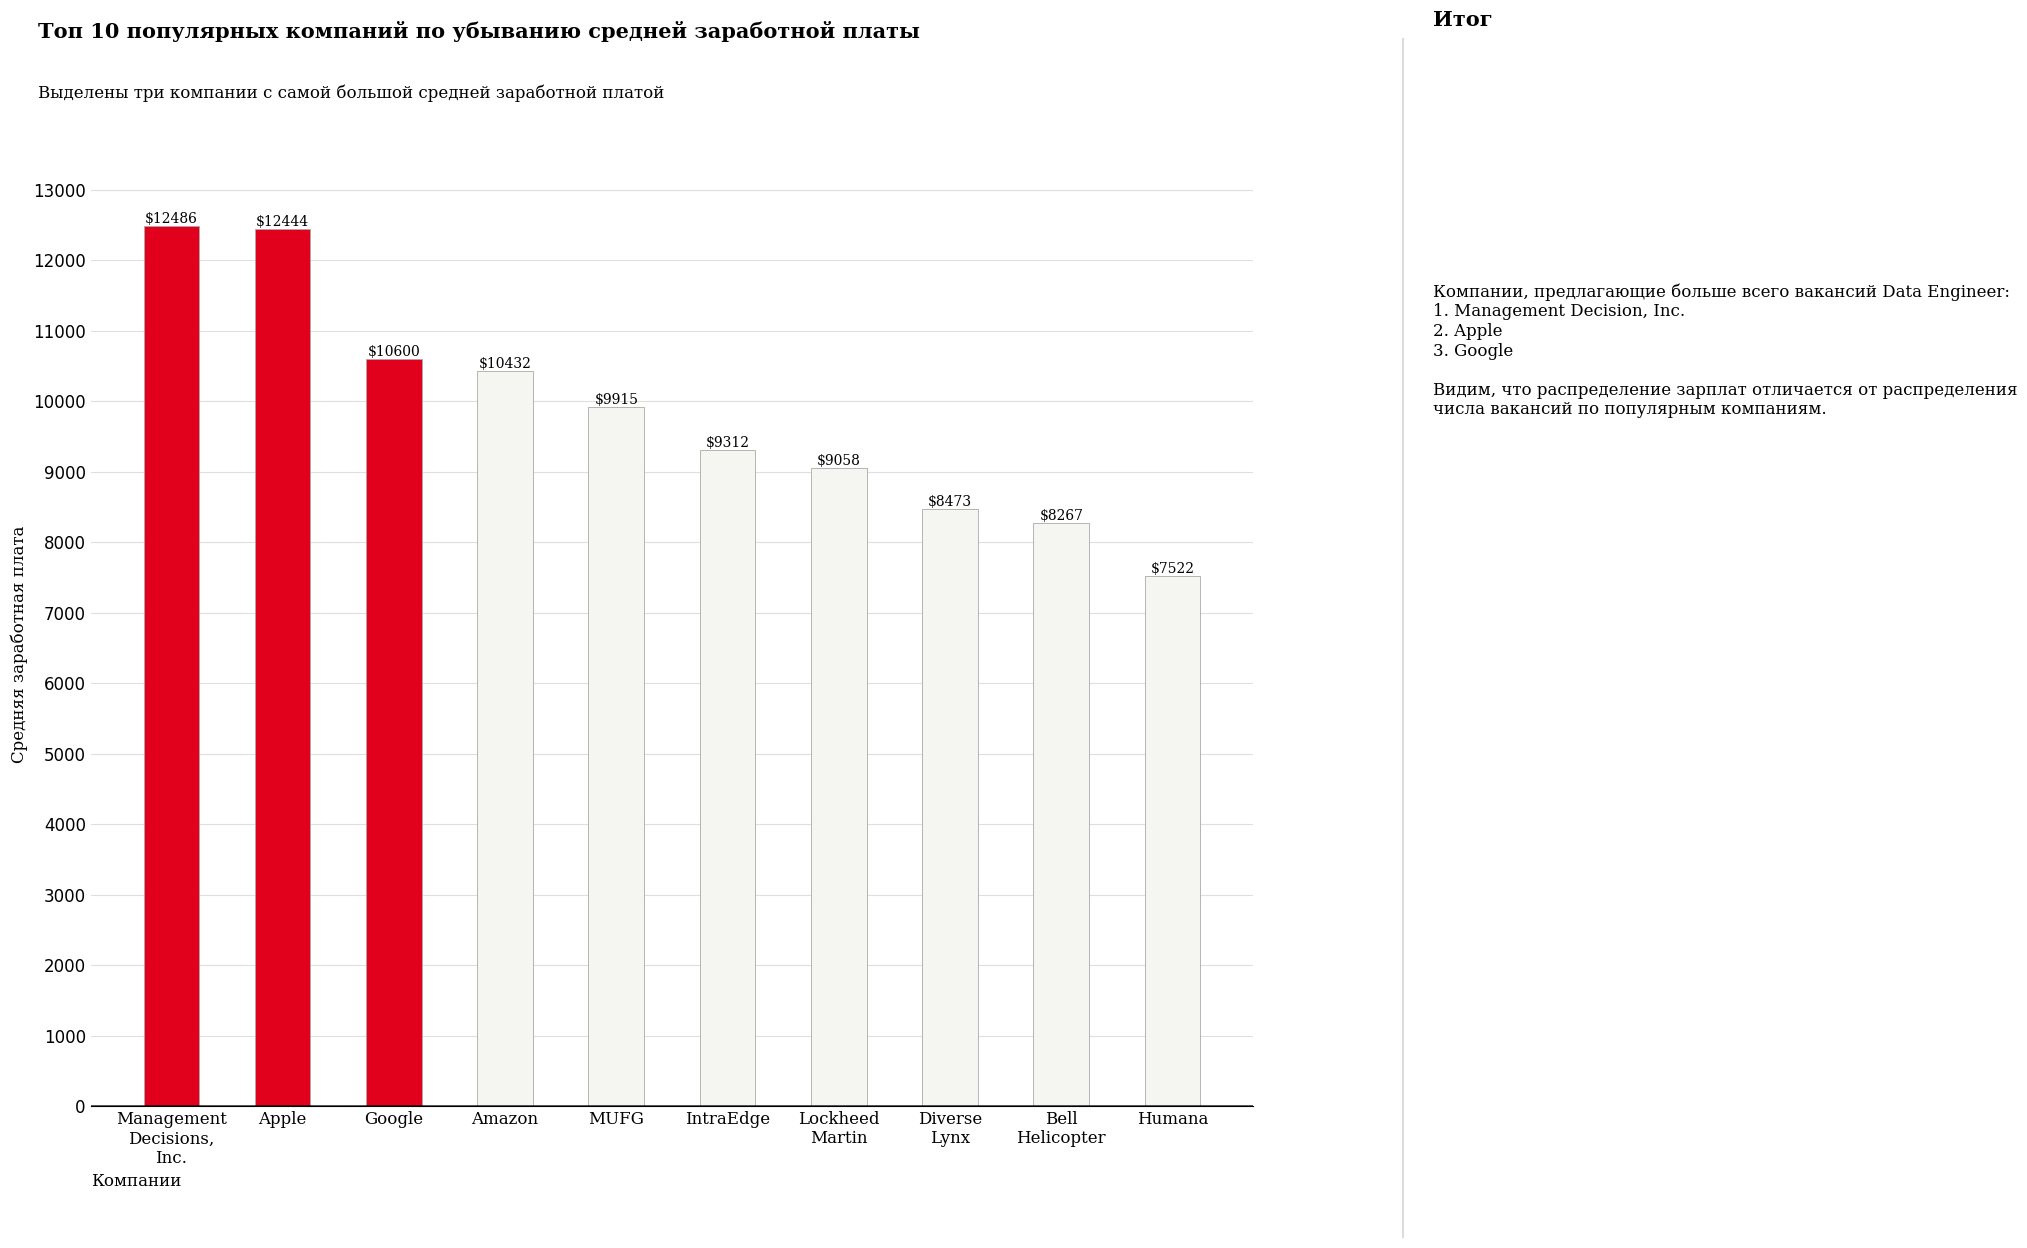

In [19]:
plot_data = (data.groupby(by='company_name').agg(job_counts=('job_title', 'count'),
                                     mean_salary=('mean_salary', 'mean')).sort_values(by='job_counts', ascending=False).head(10).sort_values(by='mean_salary', ascending=False))

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e1011c'

fig, ax = plt.subplots(1,1, figsize=(15, 12))
ax.bar(plot_data.index, plot_data['mean_salary'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels

ax.set_xticklabels([i.replace(' ', '\n')for i in plot_data.index], fontfamily='serif', rotation=0)

#annotations
for i in plot_data.index:
    ax.annotate("${:.0f}".format(plot_data.loc[i, 'mean_salary']), 
                   xy=(i, plot_data.loc[i, 'mean_salary'] + 100), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


# Title and sub-title
fig.text(0.09, 1, 'Топ 10 популярных компаний по убыванию средней заработной платы', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три компании с самой большой средней заработной платой', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.02, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.02, 0.67, '''
Компании, предлагающие больше всего вакансий Data Engineer:
1. Management Decision, Inc.
2. Apple
3. Google

Видим, что распределение зарплат отличается от распределения
числа вакансий по популярным компаниям.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 14000, 1000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
plt.xlabel("Компании", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
plt.ylabel("Средняя заработная плата", fontsize=12, fontweight='light', fontfamily='serif')

    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)



l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**Облако тегов по описаниям вакансий**

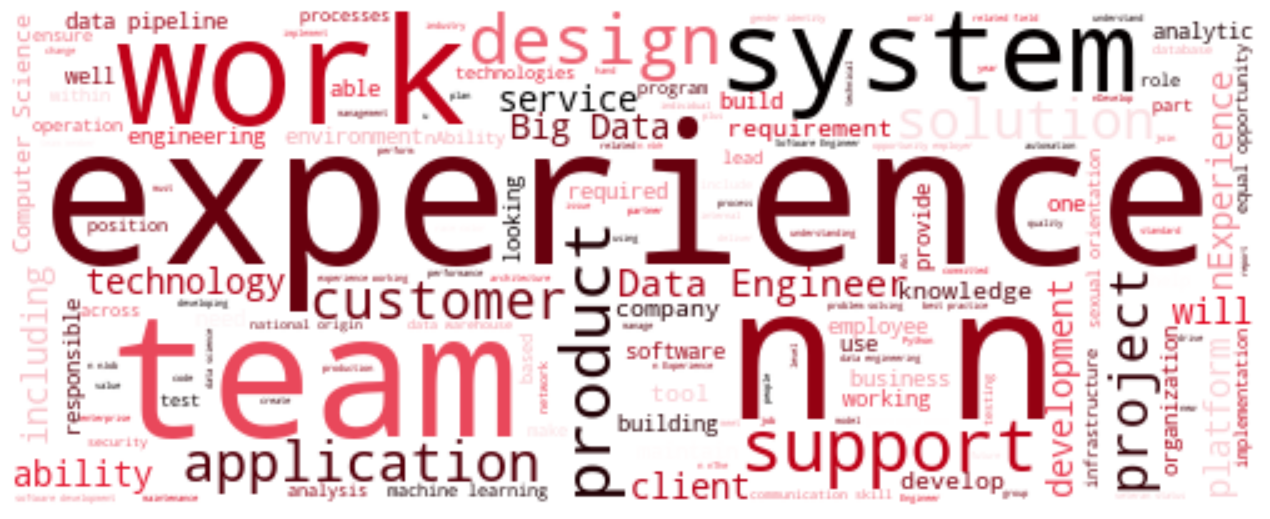

In [20]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#000000', '#e1011c', '#ffffff'])

text = str(list(data.job_description)).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('\n', ' ')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(15,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()